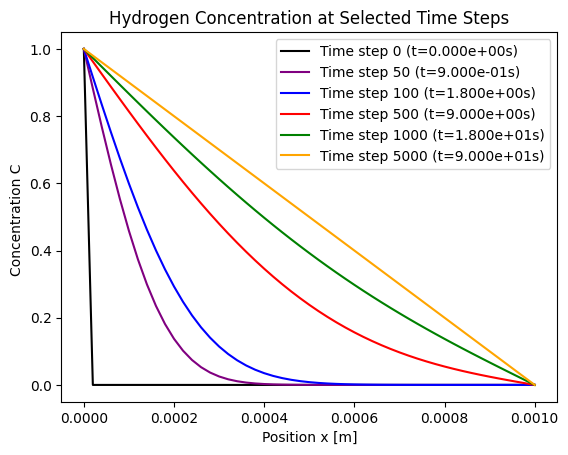

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Define physical parameters ---
L = 0.001      # membrane length [m]
D = 1e-8    # diffusivity [m^2/s]

# --- 2) Define numerical parameters ---
Nx = 51
dx = L / (Nx - 1)
dt = 0.9 * dx**2 / (2*D)  # explicit scheme stability criterion with a safety factor

num_steps = 5000
# dt = 3 * 24 *3/ num_steps
# --- 3) Create the spatial grid ---
x = np.linspace(0, L, Nx)

# --- 4) Initialize the concentration array for all time steps ---
#     We'll store concentration at every time step to facilitate plotting later.
C_time = np.zeros((num_steps + 1, Nx))

# --- 5) Set initial condition (t=0) and boundary conditions ---
C_time[0, :] = 0.0       # initial condition: concentration = 0 everywhere
C_left  = 1.0
C_right = 0.0
C_time[0, 0]  = C_left
C_time[0, -1] = C_right

# --- 6) Time-marching loop ---
for n in range(num_steps):
    # Copy the old time step:
    C_old = C_time[n].copy()
    C_new = C_old.copy()
    
    # Update interior points using the explicit scheme
    for i in range(1, Nx-1):
        C_new[i] = C_old[i] + (D * dt / dx**2) * (C_old[i+1] - 2*C_old[i] + C_old[i-1])
    
    # Reapply boundary conditions
    C_new[0]  = C_left
    C_new[-1] = C_right
    
    # Store the new concentration profile
    C_time[n+1, :] = C_new

# --- 7) Plot the concentration profiles for four different time steps on one figure ---
time_points = [0,50,100, 500, 1000, 5000]  # pick any four (or fewer) steps
colors = ["black","purple","blue", "red", "green", "orange"]  # each profile gets a unique color

plt.figure()
for i, t_step in enumerate(time_points):
    plt.plot(
        x,
        C_time[t_step, :],
        label=f"Time step {t_step} (t={t_step*dt:.3e}s)",
        color=colors[i]  # unique color for each line
    )

plt.xlabel("Position x [m]")
plt.ylabel("Concentration C ")
plt.title("Hydrogen Concentration at Selected Time Steps")
plt.legend()
plt.show()

## **ADD TEMPERATURE**

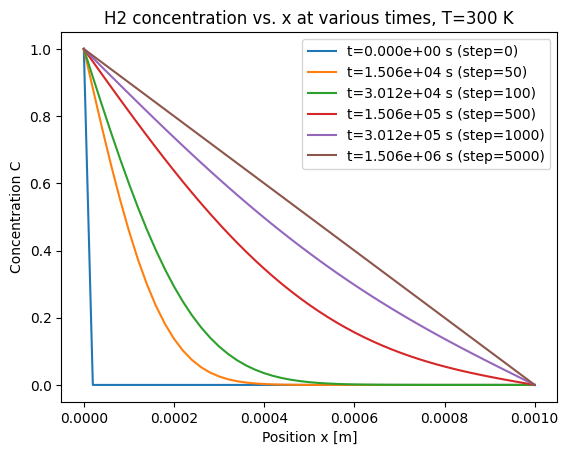

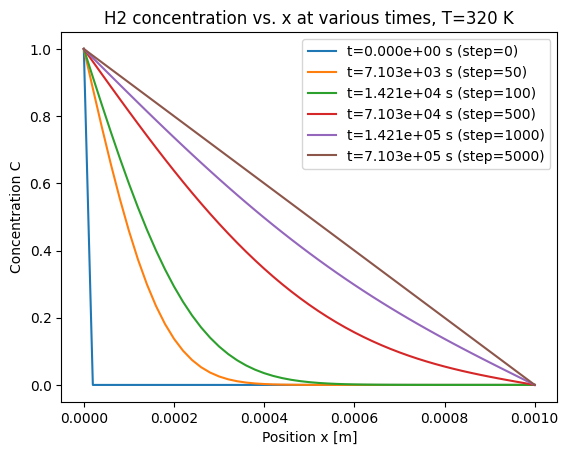

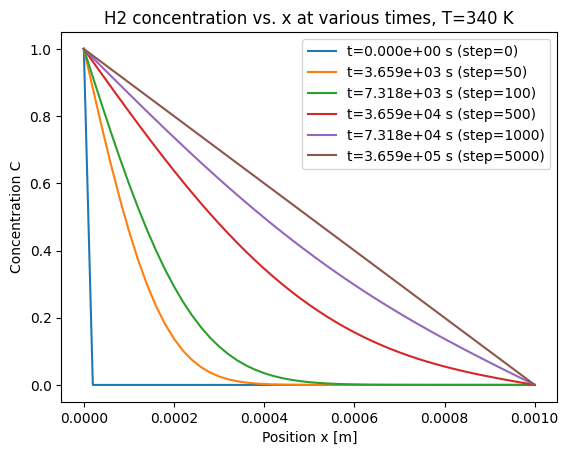

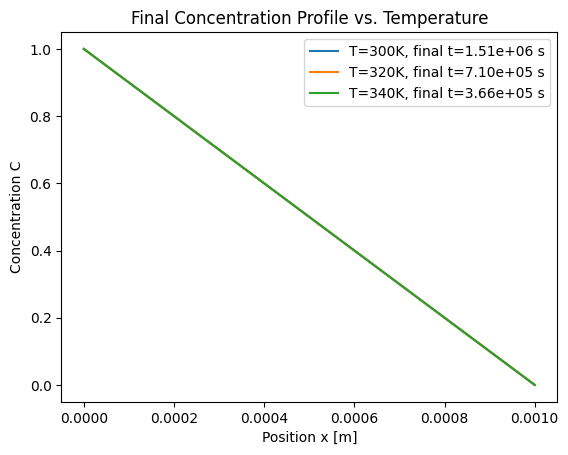

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Physical and numerical parameters (some constants) ---
L   = 0.001         # membrane thickness [m]
Nx  = 51
x   = np.linspace(0, L, Nx)
dx  = x[1] - x[0]

# Activation-energy constants for Arrhenius-type diffusivity:
D0 = 1.0e-7     # [m^2/s], example pre-exponential
Ea = 30.0e3     # [J/mol], example activation energy
R  = 8.314      # [J/(mol*K)]

# Simulation control:
num_steps = 5000
time_points = [0, 50, 100, 500, 1000, 5000] 

# Boundary conditions:
C_left  = 1.0
C_right = 0.0

# Temperatures we want to examine:
T_values = [300, 320, 340]  # in Kelvin

# Dictionary to store results for each T
results = {}

for T in T_values:
    # 1) Compute D at this temperature using Arrhenius
    D = D0 * np.exp(-Ea/(R*T))

    # 2) Compute a stable dt for the explicit scheme
    #    (simple stability condition for 1D diffusion):
    dt = 0.9 * dx**2 / (2 * D)

    # 3) Initialize a 2D array to store concentration vs. time
    C_time = np.zeros((num_steps + 1, Nx))
    # Initial condition: zero inside, apply boundary conditions
    C_time[0, :]  = 0.0
    C_time[0, 0]  = C_left
    C_time[0, -1] = C_right

    # 4) Time-marching loop
    for n in range(num_steps):
        C_old = C_time[n].copy()
        C_new = C_old.copy()
        
        # Update interior points
        for i in range(1, Nx-1):
            C_new[i] = C_old[i] + (D*dt/dx**2) * (C_old[i+1] - 2*C_old[i] + C_old[i-1])
        
        # Reapply boundary conditions
        C_new[0]  = C_left
        C_new[-1] = C_right
        
        # Store for next iteration
        C_time[n+1,:] = C_new
    
    # Store entire time evolution for this T
    results[T] = {
        "C_time":  C_time,
        "dt":      dt
    }

    # --- Make a plot of the concentration profile at chosen time steps ---
    plt.figure()
    for step_idx in time_points:
        if step_idx <= num_steps:
            plt.plot(
                x,
                C_time[step_idx, :],
                label=f"t={step_idx*dt:.3e} s (step={step_idx})"
            )
    
    plt.xlabel("Position x [m]")
    plt.ylabel("Concentration C")
    plt.title(f"H2 concentration vs. x at various times, T={T} K")
    plt.legend()
    plt.show()

# --- Optionally: Compare final profiles across all temperatures ---
plt.figure()
for T in T_values:
    C_time = results[T]["C_time"]
    dt     = results[T]["dt"]
    # Plot the final time-step
    plt.plot(
        x,
        C_time[-1, :],
        label=f"T={T}K, final t={num_steps*dt:.2e} s"
    )

plt.xlabel("Position x [m]")
plt.ylabel("Concentration C")
plt.title("Final Concentration Profile vs. Temperature")
plt.legend()
plt.show()

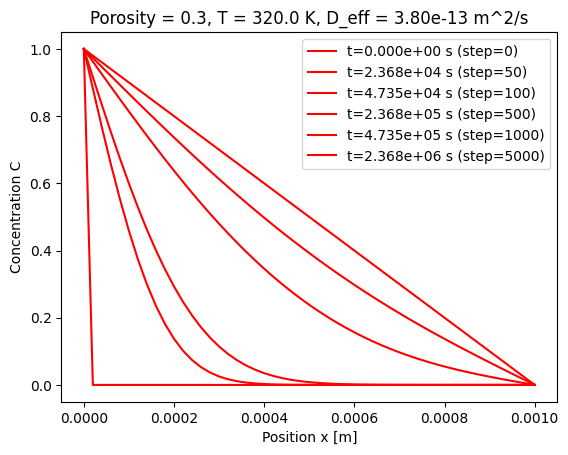

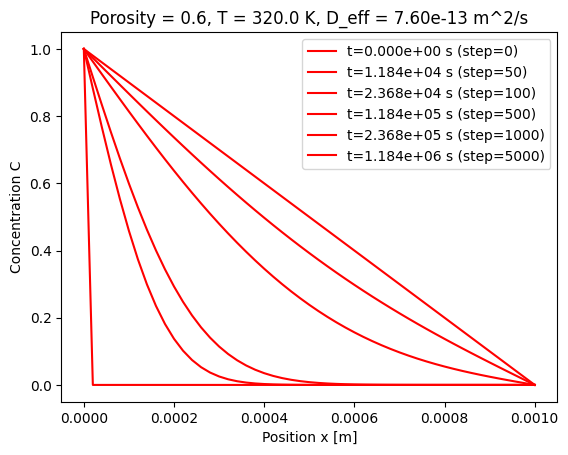

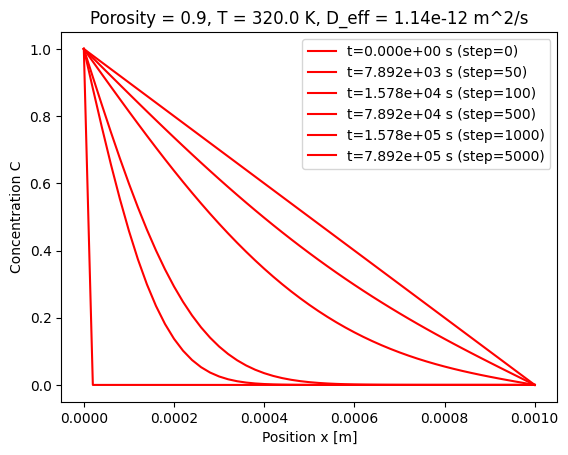

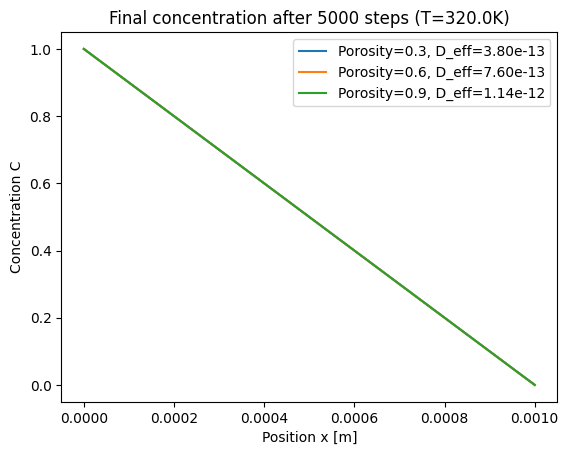

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) Define physical constants
# ------------------------------------------------------------------------------
L = 75e-6          # Membrane thickness [m]
Nx = 51
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Activation-energy constants for Arrhenius law:
D0 = 1.0e-7        # [m^2/s]    pre-exponential
Ea = 30.0e3        # [J/mol]    activation energy
R  = 8.314         # [J/(mol*K)]
T  = 320.0         # [K]        one chosen temperature

# ------------------------------------------------------------------------------
# 2) Choose several porosity values to see how they impact diffusion
# ------------------------------------------------------------------------------
porosity_values = [0.3, 0.6, 0.9]

# ------------------------------------------------------------------------------
# 3) Define time-stepping parameters
# ------------------------------------------------------------------------------
num_steps = 5000
time_points = [0, 50, 100, 500, 1000, 5000]  # which steps to plot

# Boundary conditions:
C_left  = 1.0
C_right = 0.0

# ------------------------------------------------------------------------------
# 4) Loop over multiple porosities, run the same diffusion process
# ------------------------------------------------------------------------------
results = {}

# Compute temperature-based "bare" diffusivity from Arrhenius:
D_temp = D0 * np.exp(-Ea / (R * T))

for phi in porosity_values:
    # Effective diffusivity with porosity:
    D_eff = phi * D_temp

    # Choose a stable dt based on D_eff:
    dt = 0.9 * dx**2 / (2 * D_eff)

    # Prepare an array for storing concentration vs. time
    C_time = np.zeros((num_steps + 1, Nx))

    # Initial condition: zero everywhere
    C_time[0, :] = 0.0
    # Apply boundary conditions at t=0
    C_time[0, 0]  = C_left
    C_time[0, -1] = C_right

    # Time marching
    for n in range(num_steps):
        C_old = C_time[n].copy()
        C_new = C_old.copy()

        # Update interior nodes with an explicit scheme
        for i in range(1, Nx - 1):
            C_new[i] = C_old[i] + (D_eff * dt / dx**2) * (C_old[i+1] - 2*C_old[i] + C_old[i-1])

        # Reapply boundary conditions
        C_new[0]  = C_left
        C_new[-1] = C_right

        # Store
        C_time[n+1, :] = C_new

    # Save all results for this porosity
    results[phi] = {"C_time": C_time, "dt": dt, "D_eff": D_eff}

    # --- Plot intermediate results at chosen time steps ---
    plt.figure()
    for step_idx in time_points:
        if step_idx <= num_steps:
            plt.plot(
                x,
                C_time[step_idx, :],
                label=f"t={step_idx*dt:.3e} s (step={step_idx})",
            )
    plt.xlabel("Position x [m]")
    plt.ylabel("Concentration C")
    plt.title(f"Porosity = {phi}, T = {T} K, D_eff = {D_eff:.2e} m^2/s")
    plt.legend()
    plt.show()

# ------------------------------------------------------------------------------
# 5) Compare final-time profiles across all porosities
# ------------------------------------------------------------------------------
plt.figure()
for phi in porosity_values:
    C_time = results[phi]["C_time"]
    dt     = results[phi]["dt"]
    plt.plot(
        x,
        C_time[-1,:],
        label=f"Porosity={phi}, D_eff={results[phi]['D_eff']:.2e}"
    )

plt.xlabel("Position x [m]")
plt.ylabel("Concentration C")
plt.title(f"Final concentration after {num_steps} steps (T={T}K)")
plt.legend()
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1) Example: run the solver for two porosity values (0.3, 0.6) 
#    We'll store results in a dictionary for later plotting.
#    For brevity, we skip temperature dependence here but you can easily re-insert it.
# ------------------------------------------------------------------------------

def run_diffusion(phi, Nx=51, L=0.75e-6, D=1e-8, num_steps=5000):
    """
    Runs a 1D explicit diffusion simulation with the given porosity phi,
    returning a dictionary with 'C_time' and 'dt'.
    """
    x = np.linspace(0, L, Nx)
    dx = x[1] - x[0]
    )
    # Effective diffusivity (simple linear scale):
    D_eff = phi * D
    
    # Time step via stability criterion (explicit scheme)
    dt = 0.9 * dx**2 / (2 * D_eff)
    
    # Prepare array for concentration vs. time
    C_time = np.zeros((num_steps + 1, Nx))
    # Initial condition: 0 everywhere
    C_time[0, :] = 0.0
    
    # Boundary conditions
    C_left  = 1.0
    C_right = 0.0
    C_time[0, 0]  = C_left
    C_time[0, -1] = C_right
    
    # Time-marching
    for n in range(num_steps):
        C_old = C_time[n].copy()
        C_new = C_old.copy()
        
        for i in range(1, Nx - 1):
            C_new[i] = C_old[i] + (D_eff * dt / dx**2)*(C_old[i+1] - 2*C_old[i] + C_old[i-1])
        
        # Reapply boundary conditions
        C_new[0]  = C_left
        C_new[-1] = C_right
        
        # Store
        C_time[n+1, :] = C_new
    
    return {"C_time": C_time, "dt": dt, "x": x, "phi": phi, "D_eff": D_eff}

# Run simulation for porosity=0.3 and porosity=0.6
porosity_values = [0.3, 0.6]
results = {}
for phi in porosity_values:
    results[phi] = run_diffusion(phi=phi)

# ------------------------------------------------------------------------------
# 2) Now we merge the plots for both porosity values into a *single figure*.
#    We want:   - all lines for phi=0.3 in BLUE
#               - all lines for phi=0.6 in RED
#    We'll vary the *line style* per time step so we can tell them apart.
# ------------------------------------------------------------------------------
time_points = [0, 50, 100, 500, 1000, 5000]
colors = {0.3: "blue", 0.6: "red"}  # color per porosity
line_styles = ["-", "--", ":", "-.", (0, (5,1)), (0, (3,1,1,1))]  # 6 distinct styles

plt.figure(figsize=(8,6))
for i, t_step in enumerate(time_points):
    for phi in porosity_values:
        x       = results[phi]["x"]
        C_time  = results[phi]["C_time"]
        dt      = results[phi]["dt"]
        label_txt = f"phi={phi}, t={t_step*dt:.2e}s"
        
        plt.plot(
            x,
            C_time[t_step, :],
            color=colors[phi],
            linestyle=line_styles[i],
            label=label_txt
        )

plt.xlabel("Position x [m]")
plt.ylabel("Concentration C")
plt.title("Comparing Two Porosities in One Figure")
plt.legend()
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 82)

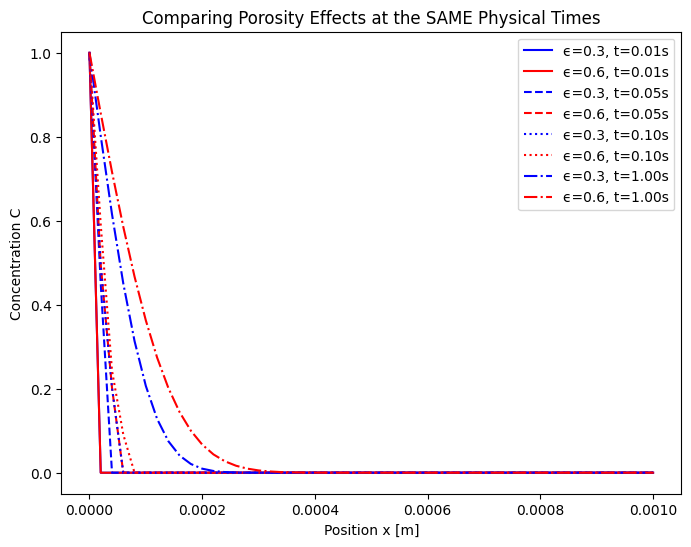

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def run_diffusion(phi, L = 0.75e-6, Nx=51, D=1e-8, T = 300, max_time=2.0):
    """
    1D explicit diffusion with:
        - phi: porosity
        - L:   domain length
        - Nx:  number of spatial points
        - D:   base diffusivity
        - max_time: maximum simulation time (seconds)
    Returns a dictionary with the full time evolution (C_time),
    the computed dt, the array x, and the number of time steps (nsteps).
    """

    # -- 1) Spatial grid --
    x = np.linspace(0, L, Nx)
    dx = x[1] - x[0]

    # -- 2) Effective diffusivity includes porosity --
    D_eff = phi * D  # simple linear scale; you can add more complex formulas if needed

    # -- 3) Stable dt (explicit scheme) and total steps so that we reach max_time --
    dt = 0.9 * dx**2 / (2 * D_eff)
    nsteps = int(np.ceil(max_time / dt))  # number of steps up to 'max_time'

    # -- 4) Prepare concentration array: (nsteps+1) x Nx --
    C_time = np.zeros((nsteps + 1, Nx))

    # -- 5) Boundary and initial conditions --
    C_left, C_right = 1.0, 0.0
    C_time[0, :] = 0.0
    C_time[0, 0]  = C_left
    C_time[0, -1] = C_right

    # -- 6) Time loop --
    for n in range(nsteps):
        C_old = C_time[n].copy()
        C_new = C_old.copy()

        # Update interior points (explicit)
        for i in range(1, Nx - 1):
            C_new[i] = C_old[i] + (D_eff * dt / dx**2) * (C_old[i+1] - 2*C_old[i] + C_old[i-1])

        # Reapply boundaries
        C_new[0]  = C_left
        C_new[-1] = C_right

        # Store
        C_time[n+1, :] = C_new

    return {
        "C_time":  C_time,
        "dt":      dt,
        "nsteps":  nsteps,
        "x":       x,
        "phi":     phi,
        "D_eff":   D_eff
    }

# ------------------------------------------------------------------------------
# Example usage: we compare two porosities over multiple *physical* times
# ------------------------------------------------------------------------------
porosity_values = [0.3, 0.6]

# We'll examine *these* times in seconds, so we can see "in progress" diffusion
times_to_plot = [0.01, 0.05, 0.1, 1.0]

# Run the solver for each porosity
results = {}
for phi in porosity_values:
    results[phi] = run_diffusion(phi=phi, L=0.001, Nx=51, D=1e-8, max_time=2.0)

# Make a single figure, using consistent colors for each porosity,
# and different line styles for each time.
color_map = {
    0.3: "blue",
    0.6: "red",
}
line_styles = ["-", "--", ":", "-."]

plt.figure(figsize=(8,6))

for i, t_phys in enumerate(times_to_plot):
    for phi in porosity_values:
        C_time = results[phi]["C_time"]
        dt     = results[phi]["dt"]
        x      = results[phi]["x"]
        nsteps = results[phi]["nsteps"]

        # Convert physical time t_phys -> time-step index
        # Make sure we don't exceed the total steps
        step_idx = int(round(t_phys / dt))
        if step_idx > nsteps:
            step_idx = nsteps  # clamp to final step if time is beyond simulation end

        # Build a label describing phi + time
        label_txt = f"ϵ={phi}, t={t_phys:.2f}s"

        plt.plot(
            x,
            C_time[step_idx, :],
            color=color_map[phi],
            linestyle=line_styles[i % len(line_styles)],
            label=label_txt
        )

plt.xlabel("Position x [m]")
plt.ylabel("Concentration C")
plt.title("Comparing Porosity Effects at the SAME Physical Times")
plt.legend()
plt.show()